In [1]:
from tqdm import tqdm
import requests
import os

### auth

In [2]:
import google.auth

# For manual authorization, can point to JSON credentials
# CREDENTIAL = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
# PROJECT = os.getenv("GOOGLE_CLOUD_PROJECT")

# Default is to assume GOOGLE_APPLICATION_CREDENTIALS is set to proper JSON credential
CREDENTIALS, PROJECT = google.auth.default()

<hr/>

<img src='https://fonts.gstatic.com/s/i/gcpiconscolors/cloud_storage/v1/24px.svg' width=200>

# Save Files to Google Cloud Storage (GCS)
### GCS ~ S3
https://cloud.google.com/storage

In [3]:
import google.cloud.storage


# config
BUCKET = f"{PROJECT}-dlp"
FILE_CATALOG_URL = os.getenv("FILE_CATALOG_URL")


# GCS client
google_cloud_storage = google.cloud.storage.Client()

# Bucket
bucket = google_cloud_storage.bucket(BUCKET)

In [4]:
# Create list of file URLs from catalog 
files = [file['file']['@url'] for file in requests.get(FILE_CATALOG_URL).json()['opaResponse']['results']['result'][0]['objects']['object']]

from base64 import b64encode
sizes = []
# save to GCS Bucket
for file in tqdm(files):
    # blob_name = file.split('https://')[1]
    # blob = bucket.blob(blob_name)
    file = requests.get(file)
    image_bytes = file.content
    sizes.append(len(b64encode(image_bytes)))
    # blob.upload_from_string(image_bytes)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109/109 [00:59<00:00,  1.84it/s]


<hr/>

<img src='https://fonts.gstatic.com/s/i/gcpiconscolors/data_loss_prevention_api/v1/24px.svg' width=200>

# Data Loss Prevention (DLP)

### Deep dive demo with Product Manager:
https://www.youtube.com/watch?v=vmFFCC9gh1Y

### API Sample Code
https://cloud.google.com/dlp/docs/libraries#using_the_client_library

### Overview
https://cloud.google.com/dlp  
https://cloud.google.com/dlp/docs/inspecting-storage  
https://cloud.google.com/dlp/docs/compute-risk-analysis  

### Information Types for Inspection
##### Leaving info_types blank or set to None is the same as including all of them.  Putting here for convenience

In [5]:
INFO_TYPES = [
{
  "name": "ADVERTISING_ID"
},
{
  "name": "AGE"
},
{
  "name": "ARGENTINA_DNI_NUMBER"
},
{
  "name": "AUSTRALIA_TAX_FILE_NUMBER"
},
{
  "name": "BELGIUM_NATIONAL_ID_CARD_NUMBER"
},
{
  "name": "BRAZIL_CPF_NUMBER"
},
{
  "name": "CANADA_SOCIAL_INSURANCE_NUMBER"
},
{
  "name": "CHILE_CDI_NUMBER"
},
{
  "name": "CHINA_RESIDENT_ID_NUMBER"
},
{
  "name": "COLOMBIA_CDC_NUMBER"
},
{
  "name": "CREDIT_CARD_NUMBER"
},
{
  "name": "CREDIT_CARD_TRACK_NUMBER"
},
{
  "name": "DATE_OF_BIRTH"
},
{
  "name": "DENMARK_CPR_NUMBER"
},
{
  "name": "EMAIL_ADDRESS"
},
{
  "name": "ETHNIC_GROUP"
},
{
  "name": "FDA_CODE"
},
{
  "name": "FINLAND_NATIONAL_ID_NUMBER"
},
{
  "name": "FRANCE_CNI"
},
{
  "name": "FRANCE_NIR"
},
{
  "name": "FRANCE_TAX_IDENTIFICATION_NUMBER"
},
{
  "name": "GENDER"
},
{
  "name": "GERMANY_IDENTITY_CARD_NUMBER"
},
{
  "name": "GERMANY_TAXPAYER_IDENTIFICATION_NUMBER"
},
{
  "name": "HONG_KONG_ID_NUMBER"
},
{
  "name": "IBAN_CODE"
},
{
  "name": "IMEI_HARDWARE_ID"
},
{
  "name": "INDIA_AADHAAR_INDIVIDUAL"
},
{
  "name": "INDIA_GST_INDIVIDUAL"
},
{
  "name": "INDIA_PAN_INDIVIDUAL"
},
{
  "name": "INDONESIA_NIK_NUMBER"
},
{
  "name": "IRELAND_PPSN"
},
{
  "name": "ISRAEL_IDENTITY_CARD_NUMBER"
},
{
  "name": "JAPAN_INDIVIDUAL_NUMBER"
},
{
  "name": "KOREA_RRN"
},
{
  "name": "MAC_ADDRESS"
},
{
  "name": "MEXICO_CURP_NUMBER"
},
{
  "name": "NETHERLANDS_BSN_NUMBER"
},
{
  "name": "NORWAY_NI_NUMBER"
},
{
  "name": "PARAGUAY_CIC_NUMBER"
},
{
  "name": "PASSPORT"
},
{
  "name": "PASSWORD"
},
{
  "name": "PERSON_NAME"
},
{
  "name": "PERU_DNI_NUMBER"
},
{
  "name": "PHONE_NUMBER"
},
{
  "name": "POLAND_NATIONAL_ID_NUMBER"
},
{
  "name": "PORTUGAL_CDC_NUMBER"
},
{
  "name": "SCOTLAND_COMMUNITY_HEALTH_INDEX_NUMBER"
},
{
  "name": "SINGAPORE_NATIONAL_REGISTRATION_ID_NUMBER"
},
{
  "name": "SPAIN_CIF_NUMBER"
},
{
  "name": "SPAIN_DNI_NUMBER"
},
{
  "name": "SPAIN_NIE_NUMBER"
},
{
  "name": "SPAIN_NIF_NUMBER"
},
{
  "name": "SPAIN_SOCIAL_SECURITY_NUMBER"
},
{
  "name": "STORAGE_SIGNED_URL"
},
{
  "name": "STREET_ADDRESS"
},
{
  "name": "SWEDEN_NATIONAL_ID_NUMBER"
},
{
  "name": "SWIFT_CODE"
},
{
  "name": "THAILAND_NATIONAL_ID_NUMBER"
},
{
  "name": "TURKEY_ID_NUMBER"
},
{
  "name": "UK_NATIONAL_HEALTH_SERVICE_NUMBER"
},
{
  "name": "UK_NATIONAL_INSURANCE_NUMBER"
},
{
  "name": "UK_TAXPAYER_REFERENCE"
},
{
  "name": "URUGUAY_CDI_NUMBER"
},
{
  "name": "US_BANK_ROUTING_MICR"
},
{
  "name": "US_EMPLOYER_IDENTIFICATION_NUMBER"
},
{
  "name": "US_HEALTHCARE_NPI"
},
{
  "name": "US_INDIVIDUAL_TAXPAYER_IDENTIFICATION_NUMBER"
},
{
  "name": "US_SOCIAL_SECURITY_NUMBER"
},
{
  "name": "VEHICLE_IDENTIFICATION_NUMBER"
},
{
  "name": "VENEZUELA_CDI_NUMBER"
},
{
  "name": "WEAK_PASSWORD_HASH"
},
{
  "name": "AUTH_TOKEN"
},
{
  "name": "AWS_CREDENTIALS"
},
{
  "name": "AZURE_AUTH_TOKEN"
},
{
  "name": "BASIC_AUTH_HEADER"
},
{
  "name": "ENCRYPTION_KEY"
},
{
  "name": "GCP_API_KEY"
},
{
  "name": "GCP_CREDENTIALS"
},
{
  "name": "JSON_WEB_TOKEN"
},
{
  "name": "HTTP_COOKIE"
},
{
  "name": "XSRF_TOKEN"
}
]

### Batch DLP Inspection

In [6]:
import google.cloud.dlp

# DLP client
dlp_client = google.cloud.dlp_v2.DlpServiceClient()

DLP_JOB_ID = "dlp-demo"
MIN_LIKELIHOOD = "VERY_UNLIKELY" # grab unlikely hits, can incease probability to reduce sensativity
FILE_TYPES = "FILE_TYPE_UNSPECIFIED" # check all files

# for reporting
BIG_QUERY_DATASET = "dlp"
BIG_QUERY_TABLE = "dlp-results"

PARENT = f"projects/{PROJECT}/locations/global"

dlp_config = {
  "jobId": DLP_JOB_ID,
  "inspectJob": {
    "actions": [{"save_findings": {"output_config": {"table": {
        "project_id": PROJECT,
        "table_id": BIG_QUERY_TABLE,
        "dataset_id": BIG_QUERY_DATASET
    }}}}],
    "inspect_config": {
        "info_types":INFO_TYPES,
        "min_likelihood": MIN_LIKELIHOOD,
        "include_quote": True
    },
    "storage_config": {"cloud_storage_options": {
        "files_limit_percent": 100,
        "file_set": {"regex_file_set": {"bucket_name": BUCKET}},
        "file_types": [FILE_TYPES]
    }}}}

In [7]:
operation = dlp_client.create_dlp_job(request={"parent": PARENT, "inspect_job": dlp_config['inspectJob']})

In [8]:
!date
print(f"Inspection operation started: {operation.name}")

Fri May 20 15:31:50 EDT 2022
Inspection operation started: projects/singularity-beta/locations/global/dlpJobs/i-2066573364666159000


### Check Status

In [9]:
%%time

import time
while dlp_client.get_dlp_job(name=operation.name).state.name != "DONE":
    dlp_job = dlp_client.get_dlp_job(name=operation.name)
    time.sleep(10)
print(f"State: {dlp_job.state.name} : {dlp_job.inspect_details.result.processed_bytes / dlp_job.inspect_details.result.total_estimated_bytes * 100}% scanned")

State: RUNNING : 0.0% scanned
CPU times: user 445 ms, sys: 498 ms, total: 943 ms
Wall time: 12min 53s


In [12]:
hits = []
total_hits = 0

for hit in dlp_client.get_dlp_job(name=operation.name).inspect_details.result.info_type_stats:
    hits.append([hit.info_type.name, hit.count])
    total_hits += hit.count
print(f"total_hits {total_hits}")
hits

total_hits 2322342


[['CANADA_SOCIAL_INSURANCE_NUMBER', 1],
 ['PERSON_NAME', 2271008],
 ['EMAIL_ADDRESS', 122],
 ['PASSWORD', 77],
 ['FDA_CODE', 48754],
 ['PHONE_NUMBER', 50],
 ['AGE', 2131],
 ['ETHNIC_GROUP', 140],
 ['STREET_ADDRESS', 40],
 ['NETHERLANDS_BSN_NUMBER', 3],
 ['GERMANY_IDENTITY_CARD_NUMBER', 7],
 ['US_SOCIAL_SECURITY_NUMBER', 4],
 ['GENDER', 4],
 ['DATE_OF_BIRTH', 1]]

<hr/>

<img src="https://fonts.gstatic.com/s/i/gcpiconscolors/bigquery/v1/24px.svg"  width=200/>

# Reporting w/ BigQuery & Pandas
### Inspect Results

In [13]:
import pandas as pd

TBL = f"`{PROJECT}.{BIG_QUERY_DATASET}.{BIG_QUERY_TABLE}`"

# Polished Report

### Bulk Download

In [14]:
%%time
# ~10-20 secs


# Get raw data
df = pd.read_gbq(f"""

    SELECT 
        quote, info_type.name, likelihood, location, 
    FROM {TBL} 
    WHERE  likelihood in ('VERY_LIKELY','LIKELY', 'POSSIBLE')
    
    """, use_bqstorage_api=True, progress_bar_type=True)

CPU times: user 14.4 s, sys: 8.89 s, total: 23.3 s
Wall time: 20.7 s


### Transformations

In [15]:
%%time
# ~15-20 secs


df = pd.concat([df, pd.json_normalize(df["location"])], axis=1)
drop_cols = ["location","byte_range","codepoint_range","container.type", "container.project_id", "container.root_path", "container.update_time.timestamp", "container.update_time.seconds", "container.update_time.nanos", "container.version","byte_range.start","byte_range.end","container.relative_path"]
df = df.drop(drop_cols, axis=1)

df["content_locations"] = df.apply(lambda x: x["content_locations"][0], axis=1)
df = pd.concat([df, pd.json_normalize(df["content_locations"])], axis=1)

drop_cols = list(pd.json_normalize(df["content_locations"]).columns)

# Include for visual analysis
drop_cols.remove("image_location.bounding_boxes")

drop_cols.append("content_locations")
df = df.drop(drop_cols, axis=1)

df = df.rename(columns={"container.full_path":"object_path","image_location.bounding_boxes":"bounding_boxes"})

CPU times: user 29.5 s, sys: 1.2 s, total: 30.7 s
Wall time: 30.8 s


### Report -- Types & Likelihood

In [16]:
df.drop(["bounding_boxes"], axis=1).sort_values(["name"])

,quote,name,likelihood,object_path
620243,2y>O,AGE,VERY_LIKELY,gs://singularity-beta-dlp/catalog.archives.gov...
447369,0? yo,AGE,VERY_LIKELY,gs://singularity-beta-dlp/catalog.archives.gov...
447195,30` yo,AGE,VERY_LIKELY,gs://singularity-beta-dlp/catalog.archives.gov...
447183,6Y_O,AGE,VERY_LIKELY,gs://singularity-beta-dlp/catalog.archives.gov...
447176,4 Yo,AGE,VERY_LIKELY,gs://singularity-beta-dlp/catalog.archives.gov...
...,...,...,...,...
196268,448-20-6915,US_SOCIAL_SECURITY_NUMBER,POSSIBLE,gs://singularity-beta-dlp/catalog.archives.gov...
195071,081-16-2374,US_SOCIAL_SECURITY_NUMBER,POSSIBLE,gs://singularity-beta-dlp/catalog.archives.gov...
195073,519-54-6550,US_SOCIAL_SECURITY_NUMBER,POSSIBLE,gs://singularity-beta-dlp/catalog.archives.gov...
197468,519-54-6550,US_SOCIAL_SECURITY_NUMBER,POSSIBLE,gs://singularity-beta-dlp/catalog.archives.gov...


# Types & Likelihoods

In [17]:
pd.read_gbq(f"""
    SELECT info_type.name, likelihood, count(*) AS ttl
    FROM {TBL}
    GROUP BY info_type.name, likelihood
    ORDER BY ttl DESC
""", use_bqstorage_api=True)

,name,likelihood,ttl
0,PERSON_NAME,UNLIKELY,8576256
1,PERSON_NAME,POSSIBLE,385464
2,FDA_CODE,VERY_LIKELY,192808
3,PERSON_NAME,VERY_UNLIKELY,92028
4,PERSON_NAME,LIKELY,30284
5,AGE,VERY_LIKELY,8032
6,FDA_CODE,POSSIBLE,1904
7,ETHNIC_GROUP,VERY_LIKELY,560
8,AGE,POSSIBLE,492
9,FDA_CODE,UNLIKELY,304


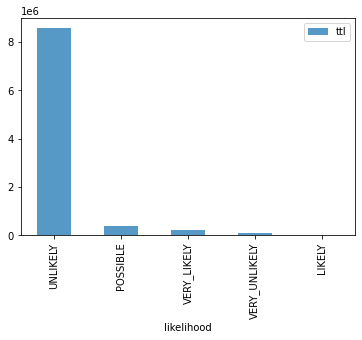

In [18]:
pd.read_gbq(f"""
    SELECT likelihood, count(*) AS ttl
    FROM {TBL}
    GROUP BY likelihood
    ORDER BY ttl DESC
""", use_bqstorage_api=True).plot.bar(stacked=True, x="likelihood", y="ttl", alpha=0.75);

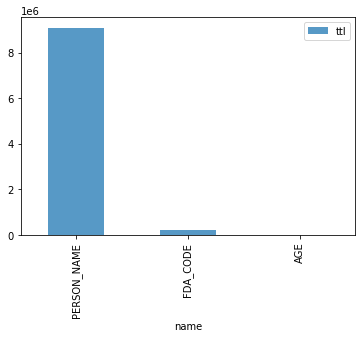

In [19]:
pd.read_gbq(f"""
    SELECT info_type.name, COUNT(*) AS ttl
    FROM {TBL}
    GROUP BY info_type.name
    HAVING ttl > 1000
    ORDER BY ttl DESC
    
""", use_bqstorage_api=True).plot.bar(stacked=True, x="name", y="ttl", alpha=0.75);